In [39]:
import numpy as np
import pandas as pd
import math
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

In [40]:
def functionValue (x):
    f=[]
    f.append([3*x[0,0]-np.cos(x[1,0]*x[2,0])-1/2])
    f.append([x[0,0]**2-81*(x[1,0]+0.1)**2+np.sin(x[2,0])+1.06])
    f.append([np.exp(-x[0,0]*x[1,0])+20*x[2,0]+(10*np.pi-3)/3])
    f=np.array(f) #轉成array 
    return f
x=[[0.5],[0],[-0.523598776]]
x=np.array(x)
functionValue(x)

array([[ 0.00000000e+00],
       [-3.47883500e-10],
       [-8.03402322e-09]])

In [41]:
def functionJacobian(x):
    Df=[]
    Df.append([3,x[2,0]*np.sin(x[1,0]*x[2,0]),x[1,0]*np.sin(x[1,0]*x[2,0])])
    Df.append([2*x[0,0],-162*(x[1,0]+0.1),np.cos(x[2,0])])
    Df.append([-x[1,0]*np.exp(-x[0,0]*x[1,0]),-x[0,0]*np.exp(-x[0,0]*x[1,0]),20])
    Df=np.array(Df)
    return Df
x=[[0.5],[0],[-0.523598776]]
x=np.array(x)
functionJacobian(x)

array([[  3.       ,   0.       ,  -0.       ],
       [  1.       , -16.2      ,   0.8660254],
       [ -0.       ,  -0.5      ,  20.       ]])

In [42]:
x=[[0.1],[0.1],[-0.1]]
x=np.array(x)
y=-np.linalg.inv(functionJacobian(x)).dot(functionValue(x)) #轉成反矩陣 
x=x-np.linalg.inv(functionJacobian(x)).dot(functionValue(x))
print("y=")
print("% 10f" % y[0,0])
print("% 10f" % y[1,0])
print("% 10f" % y[2,0])
print("x=")
print("% 10f" % x[0,0])
print("% 10f" % x[1,0])
print("% 10f" % x[2,0])

y=
  0.399870
 -0.080533
 -0.421520
x=
  0.499870
  0.019467
 -0.521520


In [43]:
x=[[0.1],[0.1],[-0.1]]
x=np.array(x)
for i in range(10):
    print("K=%d" % i)
    Dx=-np.linalg.inv(functionJacobian(x)).dot(functionValue(x)) 
    x=x+Dx
    print(x)   #可以觀察到K=開始就慢慢收斂到一個解

K=0
[[ 0.49986967]
 [ 0.01946685]
 [-0.52152047]]
K=1
[[ 0.50001424]
 [ 0.00158859]
 [-0.52355696]]
K=2
[[ 5.00000113e-01]
 [ 1.24447833e-05]
 [-5.23598450e-01]]
K=3
[[ 5.00000000e-01]
 [ 7.75785716e-10]
 [-5.23598776e-01]]
K=4
[[ 5.00000000e-01]
 [ 3.13668439e-18]
 [-5.23598776e-01]]
K=5
[[ 5.00000000e-01]
 [ 7.89109448e-18]
 [-5.23598776e-01]]
K=6
[[ 5.00000000e-01]
 [-1.05881153e-17]
 [-5.23598776e-01]]
K=7
[[ 5.00000000e-01]
 [ 7.89109448e-18]
 [-5.23598776e-01]]
K=8
[[ 5.00000000e-01]
 [-1.05881153e-17]
 [-5.23598776e-01]]
K=9
[[ 5.00000000e-01]
 [ 7.89109448e-18]
 [-5.23598776e-01]]


In [51]:
import pandas as pd

x=[[0.1],[0.1],[-0.1]]
x=np.array(x)
iteration = {
    "k": [],
    "$x_{1}^{k}$": [],
    "$x_{2}^{k}$": [],
    "$x_{3}^{k}$": [],
    "Residual": [],
}
for i in range(10):
    y = -np.linalg.inv(functionJacobian(x)).dot(functionValue(x))
    x += y
    iteration["k"].append(i)
    iteration["$x_{1}^{k}$"].append("%.10f" % x[0,0])
    iteration["$x_{2}^{k}$"].append("%.10f" % x[1,0])
    iteration["$x_{3}^{k}$"].append("%.10f" % x[2,0])
    iteration["Residual"].append(np.linalg.norm(y))
    
pd.DataFrame(iteration)

,k,$x_{1}^{k}$,$x_{2}^{k}$,$x_{3}^{k}$,Residual
0,0,0.4998696729,0.0194668485,-0.5215204719,5.865670e-01
1,1,0.5000142402,0.0015885914,-0.5235569643,1.799445e-02
2,2,0.5000001135,0.0000124448,-0.5235984501,1.576756e-03
3,3,0.5000000000,0.0000000008,-0.5235987756,1.244878e-05
4,4,0.5000000000,0.0000000000,-0.5235987756,7.760833e-10
5,5,0.5000000000,0.0000000000,-0.5235987756,8.906369e-17
6,6,0.5000000000,-0.0000000000,-0.5235987756,9.117219e-17
7,7,0.5000000000,0.0000000000,-0.5235987756,9.117219e-17
8,8,0.5000000000,-0.0000000000,-0.5235987756,9.117219e-17
9,9,0.5000000000,0.0000000000,-0.5235987756,9.117219e-17


,$x_{1}^{k}$,$x_{2}^{k}$,Residual
0,0.500000,5.000000e-01,5.830952e-01
1,1.080000,4.400000e-01,2.711977e-01
2,0.947690,2.032677e-01,1.683351e-01
3,0.988144,3.986592e-02,4.081016e-02
4,0.999877,7.786498e-04,7.882578e-04
5,1.000000,4.821830e-08,4.822754e-08
6,1.000000,-5.363168e-17,0.000000e+00


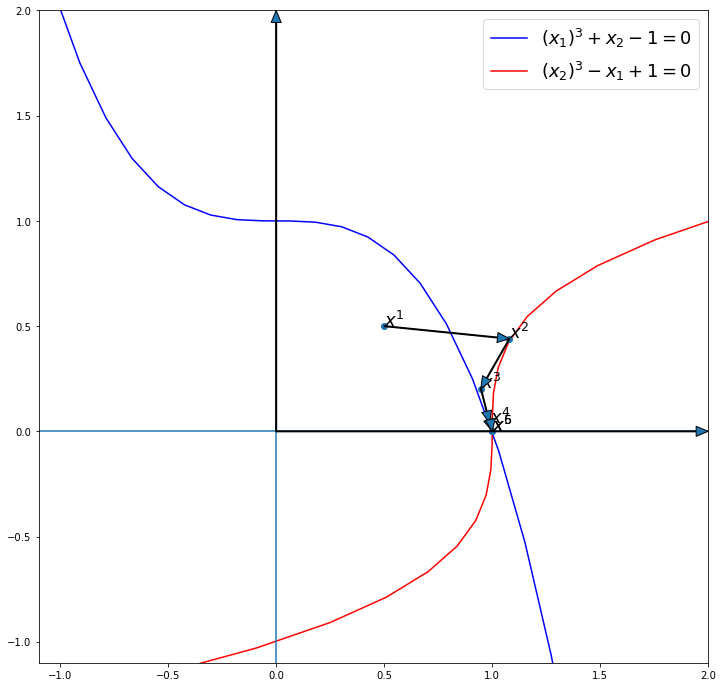

In [54]:
import matplotlib.pyplot as plt
def functionValue(x):
    f = []
    f.append([x[0,0]**3 + x[1,0] - 1])
    f.append([x[1,0]**3 - x[0,0] + 1])
    return np.array(f)
def functionJacobian(x):
    Df = []
    Df.append([3*x[0,0]**2, 1])
    Df.append([-1, 3*x[1,0]**2])
    Df = np.array(Df)
    return Df

x = np.array([[0.5], [0.5]])
iteration = {
    "$x_{1}^{k}$": [],
    "$x_{2}^{k}$": [],
    "Residual": [],
}

fig, ax = plt.subplots(figsize=(12, 12))
X = np.linspace(-6,6,100)
Y1 = -X**3 + 1
Y2 = X**3 + 1
ax.plot(X, Y1, '-b', label='$(x_1)^3+x_2 -1 = 0$')
ax.plot(Y2, X, '-r', label='$(x_2)^3-x_1 +1 = 0$')
ax.axhline(y=0, xmin=-4, xmax=4)
ax.axvline(x=0, ymin=0, ymax=8)
ax.annotate("", xy=(0, 2), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.annotate("", xy=(2, 0), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
plt.xlim(-1.1, 2)
plt.ylim(-1.1, 2)

c = 0
while True:
    y = -np.linalg.inv(functionJacobian(x)).dot(functionValue(x))
    iteration["$x_{1}^{k}$"].append(x[0,0])
    iteration["$x_{2}^{k}$"].append(x[1,0])
    iteration["Residual"].append(np.linalg.norm(y))
    if(np.linalg.norm(y) <= 1e-16):
        break
    x += y
    try:
        c +=1
        ax.text(iteration["$x_{1}^{k}$"][-1], iteration["$x_{2}^{k}$"][-1], f'$x^{c}$',fontsize=18)
        ax.annotate("", xy=(iteration["$x_{1}^{k}$"][-1], iteration["$x_{2}^{k}$"][-1]), xytext=(iteration["$x_{1}^{k}$"][-2], iteration["$x_{2}^{k}$"][-2]),arrowprops=dict(width=1,headwidth=10))
        
    except:
        continue
    


ax.plot(iteration["$x_{1}^{k}$"],iteration["$x_{2}^{k}$"],'o')
ax.legend(loc='upper right',fontsize=18)
##ax.plot([1.15, 0.9071347191], [0.55, 0.1215036680], 'o')
pd.DataFrame(iteration)

In [52]:
x=np.array([[0.5],[0.5]])
iterationNo=[]
iterationx1=[]
iterationx2=[]
iterationResidual=[]
i=0
iterationNo.append(i)
iterationx1.append("%.10f" % x[0,0])
iterationx2.append("%.10f" % x[1,0])

error=np.linalg.norm(functionValue(x)) 
iterationResidual.append(error)
i=i+1
while i<10 and error > 1e-4:
    Dx=-np.linalg.inv(functionJacobian(x)).dot(functionValue(x)) 
    x=x+Dx
    iterationNo.append(i)
    iterationx1.append("%.10f" % x[0,0])
    iterationx2.append("%.10f" % x[1,0])
    
    error=np.linalg.norm(functionValue(x))
    iterationResidual.append("%.10e" % (error))
    i=i+1

Table = {"k": iteratioinNo,"$x_{1}^{k}$":iterationx1,"$x_{2}^{k}":iterationx2,"Residual":iterationResidual}
SelectedDF = pd.DataFrame(Table)
SelectedDF.sort_values(by = "k")

IndexError: index 2 is out of bounds for axis 0 with size 2

In [50]:
iteratedx=[[1,1],[1.70588235,2.11764706],[1.51011342,2.44751599],[1.33340827,2.66653440]]
iteratedx=[[x[0][0,0],x[0],[1,0]]]
for i in [1,2,3,4,5]:
    iteratedx.append([x[i][0,0],x[i][1,0]])

ax.plot([0,4/3],[2,8/3],'o')
ax.text(0,1.8,'(0,2)',fontsize=18)
ax.text(4/3+0.1,8/3-0.1,'(4/3,8/3)',fontsize=18)

fig, ax = plt.subplots(figsize=(12, 12))
x1 = np.linspace(-1,2,100)
x2 = (y2)**3+1
y1 = -(x1)**3+1
y2 = np.linspace(-1,1,100)
ax.plot(x1, y1, '-r', label='$(x_1)^3+x_2-1= 0$')
ax.plot(x2, y2, '-b', label='$(x_2)^3-x_1+1 = 0$')

ax.axhline(y=0, xmin=-4, xmax=4)
ax.axvline(x=0, ymin=0, ymax=8)
ax.annotate("", xy=(0, 2), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.annotate("", xy=(2, 0), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.set_xlabel('$x_1$',fontsize=18)
ax.set_ylabel('$x_2$',fontsize=18)
ax.set_title('Graph',fontsize=18)

ax.annotate("", xy=(0, 2), xytext=(0, 0),arrowprops=dict(width=1,headwidth=10))
ax.annotate("", xy=(4/3, 8/3), xytext=(0, 2),arrowprops=dict(width=1,headwidth=10))
min_y_z=[]
for i in range (len(y)):
    min_y_z.append(min([y[i],z[i]]))
    
min_y_z=np.array(min_y_z)
ax.fill_between(x,0,min_y_z,where=(x>=0),facecolor="green",alpha=0.2,label="Fesible region")
ax.legend(loc='upper right',fontsize=18)
ax.grid()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed